In [3]:
##Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [4]:
##Reading in data and calculating proportions of classes
mdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mushroom.csv')
counts = mdf.groupby(['class']).size()
counts['p'] = [counts[0] / (counts[0]+counts[1]) , counts[1] / (counts[0]+counts[1])]
print(counts)
baseline = counts['p'][0]**2 + counts['p'][1]**2
print(baseline)

class
b'e'                                        4208
b'p'                                        3916
p       [0.517971442639094, 0.48202855736090594]
dtype: object
0.5006459455010605


In [5]:
##Describe the dataset
mdf.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,b'x',b'y',b'n',b'f',b'n',b'f',b'c',b'b',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'p',b'w',b'v',b'd',b'e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [6]:
##Label encoding
cols = mdf.columns
for c in cols:
  uni = mdf[c].unique()
  map = {}
  for x in range(len(uni)):
    map[uni[x]] = x
  mdf[c].replace(map, inplace= True)



In [7]:
mdf

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,0,0,1,3,1,0,1,10,0,...,6,7,0,2,0,0,8,5,6,1
8120,0,0,0,1,3,1,0,1,10,0,...,6,7,0,1,0,0,8,3,6,1
8121,3,0,0,1,3,1,0,1,1,0,...,6,7,0,2,0,0,8,5,6,1
8122,4,1,0,1,6,0,0,0,8,1,...,0,0,0,0,0,1,4,3,6,0


In [8]:
##Shuffle the data to mitigate overfitting
np.random.shuffle(mdf.values)

In [9]:
##Split into training and testing

index_20percent = int(0.2 * len(mdf.index))
print(index_20percent)
test = mdf[:index_20percent]
train = mdf[index_20percent:]

XVALID = test.drop(columns = 'class')
YVALID = pd.DataFrame(test['class'])
XTRAIN = train.drop(columns = 'class', axis = 1)
YTRAIN = pd.DataFrame(train['class'])
shapes = [XTRAIN, YTRAIN, XVALID, YVALID]
for i in shapes:
  print(i.shape)

1624
(6500, 22)
(6500, 1)
(1624, 22)
(1624, 1)


In [18]:
##Create simple logistic regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 22, activation = 'linear'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 23        
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
##Log callbacks for model checkpoints
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'best_model', monitor = 'val_loss', save_best_only = True, save_weights_only = True)
callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 20, verbose = 1)


In [28]:
##Fit the model and output epoch information
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), epochs = 100, batch_size = 10, callbacks = [callback_a,callback_b], verbose = 0)

Epoch 21: early stopping


In [29]:
print(history.params)

{'verbose': 0, 'epochs': 100, 'steps': 650}


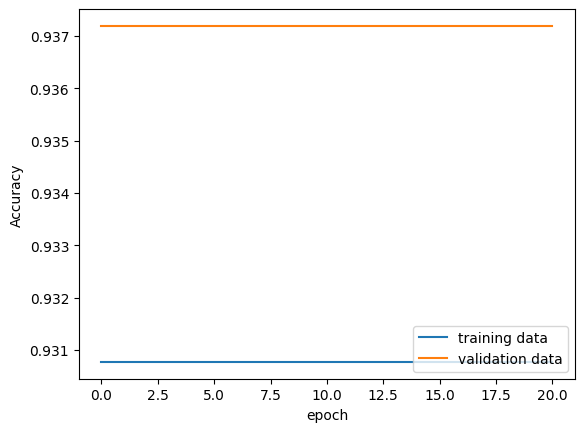

In [30]:
##Plot the accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

In [33]:
model.load_weights('best_model')

In [34]:
#Evaluate the model with training data
scores = model.evaluate(XTRAIN, YTRAIN)
print(model.metrics_names)
print(scores)
print(model.metrics_names[1], scores[1]*100)

204/204 [==============================] - 0s 2ms/step - loss: 4.1707e-04 - accuracy: 1.0000
['loss', 'accuracy']
[0.00041706638876348734, 1.0]
accuracy 100.0


In [35]:
##Evaluate the model with test data
scores = model.evaluate(XVALID, YVALID)
print(model.metrics_names[1], scores[1]*100)

51/51 [==============================] - 0s 1ms/step - loss: 4.1135e-04 - accuracy: 1.0000
accuracy 100.0


In [36]:
print(XVALID[0:5])
print(YVALID[0:5])

   cap-shape  cap-surface  cap-color  bruises%3F  odor  gill-attachment  \
0          0            1          4           0     3                0   
1          3            0          4           1     7                0   
2          0            1          0           0     3                0   
3          0            0          2           0     4                0   
4          0            0          3           0     4                0   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           6            1  ...   
1             0          0           8            1  ...   
2             0          1           6            1  ...   
3             0          1           3            1  ...   
4             0          1           5            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         0                       2                       1   
1                         0   

In [37]:
##Show plot for what the prediction values actually are
prediction = model.predict(XVALID)
print(prediction[0:10])
print(prediction[0:10].round())

plt.plot(YVALID, prediction, '.', alpha = 0.3)
plt.xlabel('Correct labels')
plt.ylabel('Predicted confidence scores')
plt.show()

51/51 [==============================] - 0s 2ms/step


In [38]:
##Doesn't work. Use for logistic regression
def my_prediction_function(model, data):
  w = [None]*numOfFeatures
  for i in range(numOfFeatures):
     w[i] = model.layers[numOfLayers-1].get_weights()[0][i]
  bias = model.layers[numOfLayers-1].get_weights()[1] 
  z = 0
  for i in range(numOfFeatures):
    z = z + features[numOfLayers-2][:,i]*w[i]
  z = z + bias
  result = 1/(1+np.exp(-z))
  return result 

[[9.9971837e-01]
 [1.7164686e-09]
 [9.9999362e-01]
 [4.3107439e-03]
 [4.2182561e-05]
 [9.9999934e-01]
 [9.9999845e-01]
 [5.0287481e-06]
 [9.9906445e-01]
 [2.9532012e-04]]


In [16]:
##Iterate through different complexities of neural network models
def model_mash(first = [], hiddens = [[]]):
  models = []
  first = first
  hiddens = hiddens
  for k in range(len(first)):
    inst = Sequential()
    inst.add(Dense(first[k], input_dim = 22, activation = 'relu'))
    for l in range(len(hiddens[k])):
      inst.add(Dense(hiddens[k][l], activation = 'relu'))
    inst.add(Dense(1, activation = 'sigmoid'))
    print(inst.summary())
    inst.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    history = inst.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), epochs = 10, batch_size = 10, callbacks = [callback_a,callback_b])
    scores_train = inst.evaluate(XTRAIN, YTRAIN)
    print(inst.metrics_names)
    print(scores)
    print(inst.metrics_names[1], scores[1]*100)
    scores_test = inst.evaluate(XVALID, YVALID)
    print(inst.metrics_names[1], scores[1]*100)
    models.append([inst, inst.metrics_names[1], scores_train[1]*100, scores_test[1]*100])


In [17]:
##Call the function
model_mash(first = [64,32,16,8,4,2], hiddens = [[32,16,8],[16,8],[8],[],[],[]])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                1472      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
650/650 [===========================

NameError: ignored

In [45]:
##Show the datatable for the accuracy of each model against the others
print('-Model-', '-Training Acc-', '-Test Acc-')
for x in range(len(models)):
  print(first[x], hiddens[x], '1', ':' , models[x][2], models[x][3])


-Model- -Training Acc- -Test Acc-


NameError: ignored

[NbConvertApp] Converting notebook /content/AI_final_project.ipynb to html
[NbConvertApp] Writing 670957 bytes to /content/AI_final_project.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


SyntaxError: ignored